In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
%load_ext blackcellmagic

In [3]:
# directory_19 = r'F:\Ecobee\files\2019_sac'
# for filename in os.listdir(directory_19):
#     if filename.endswith(".zip"):
#         print(os.path.join(directory_19, filename))
#     else:
#         continue

In [4]:
# users_sac_2019_name_list_csv=[w[:-4] for w in os.listdir(directory_19)]

# users_sac_2019_name_list_csv

In [5]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_offpeak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 0) &
                        (df_temp1['DateTime'].dt.hour < 12) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_offpeak = pd.concat([df_sac_18_daily_offpeak, df_day])
    g.close()
    myzip.close()

In [6]:
df_sac_18_daily_offpeak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21189 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21189 non-null  object 
 1   daily_total_heating  21189 non-null  float64
 2   daily_total_cooling  21189 non-null  float64
 3   user_id              21189 non-null  object 
dtypes: float64(2), object(2)
memory usage: 827.7+ KB


In [7]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2018
df_18_temp=df_sac_18_daily_offpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
df_sac_18_daily_offpeak=pd.merge(df_18_temp,df_sac_18_daily_offpeak,how='left', on='user_id')


In [8]:
df_sac_18_daily_offpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333


In [9]:
from zipfile import ZipFile
directory_19 = r'F:\Ecobee\files\2019_sac'
df_sac_19_daily_offpeak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_offpeak = pd.concat([df_sac_19_daily_offpeak, df_day])
    f.close()
    myzip.close()

In [10]:
df_sac_19_daily_offpeak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,1.937500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.095833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.945833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,2.187500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.791667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [11]:
# pd.set_option('display.max_rows', None)
# #remove user_ids that have no cooling consumption at all for 2019
# df_19_temp=df_sac_19_daily_offpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
# df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
# df_sac_19_daily_offpeak=pd.merge(df_19_temp,df_sac_19_daily_offpeak,how='left', on='user_id')

In [12]:
df_sac_19_daily_offpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,1.937500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.095833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.945833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,2.187500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.791667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [13]:
df_sac_18n19_daily_offpeak=pd.concat([df_sac_18_daily_offpeak,df_sac_19_daily_offpeak])
df_sac_18n19_daily_offpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333


In [14]:
df_sac_18n19_daily_offpeak['count'] = df_sac_18n19_daily_offpeak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_offpeak['count'].value_counts()

243    27702
121    19965
242     1694
241     1687
222     1332
236      708
240      480
239      478
238      476
117      468
230      460
218      436
193      386
119      357
118      354
122      244
120      240
237      237
235      235
234      234
232      232
231      231
229      229
228      228
225      225
224      224
219      219
217      217
108      216
211      211
205      205
97       194
96       192
186      186
175      175
84       168
167      167
83       166
164      164
157      157
152      152
144      144
133      133
125      125
123      123
115      115
112      112
110      110
109      109
101      101
100      100
94        94
46        92
89        89
87        87
73        73
65        65
37        37
12        12
3          3
Name: count, dtype: int64

In [15]:
df_sac_18n19_daily_offpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333,243


In [16]:
df_sac_18n19_daily_offpeak=df_sac_18n19_daily_offpeak[df_sac_18n19_daily_offpeak['count']>=241]
df_sac_18n19_daily_offpeak['Date']=pd.to_datetime(df_sac_18n19_daily_offpeak['Date'])
df_sac_18n19_daily_offpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333,243


In [17]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [18]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [19]:
df_sac_18n19_daily_offpeak_w_temperature=pd.merge(df_sac_18n19_daily_offpeak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_offpeak_w_temperature.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [20]:
# generate a new column indicating on/off of cooling AC
df_sac_18n19_daily_offpeak_w_temperature["AC_cooling_on"] = np.where(
    df_sac_18n19_daily_offpeak_w_temperature["daily_total_cooling"] > 0, 1, 0
)

In [21]:
df_sac_18n19_daily_offpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_offpeak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_offpeak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_offpeak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [22]:
df_sac_18n19_daily_offpeak_w_temperature['y2019']=np.where(df_sac_18n19_daily_offpeak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_offpeak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_offpeak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,AC_cooling_on,TAVG_less_62,y2019
count,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000
mean,0.000594,0.682070,242.836953,72.703632,90.349902,58.473120,0.560982,10.740694,0.497893
std,0.018012,0.953389,0.494994,5.165879,7.220133,3.978541,0.496275,5.074999,0.500004
min,0.000000,0.000000,241.000000,58.000000,69.000000,45.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,243.000000,69.000000,86.000000,56.000000,0.000000,7.000000,0.000000
50%,0.000000,0.183333,243.000000,73.000000,91.000000,58.000000,1.000000,11.000000,0.000000
75%,0.000000,1.166667,243.000000,76.000000,96.000000,61.000000,1.000000,14.000000,1.000000
max,1.541667,12.000000,243.000000,86.000000,105.000000,69.000000,1.000000,24.000000,1.000000


In [23]:
df_sac_18n19_daily_offpeak_w_temperature[
    'interaction'] = df_sac_18n19_daily_offpeak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_offpeak_w_temperature['y2019']

In [24]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_offpeak_w_temperature.groupby('user_id').apply(
    regress, 'AC_cooling_on', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.030732,-0.005126,0.563522
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.019341,0.044022,-0.007601
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.042555,0.014296,0.193422
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.019816,0.042020,0.085202
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.033537,0.022170,0.183392
5,06d89337caa78e3ed6e3591c9e22b8808a82c327,0.001441,0.055525,0.118673
6,0773f65bc76833bddd55f0f850ded5d14bc8ab99,0.012521,0.045371,0.090836
7,084a2b8c0522a36209d062d852d04bb64494ea84,0.032561,0.009142,0.338561
8,0aec426e98899420452f505669f36b1f47651c68,0.048629,0.000375,-0.034750
9,0f50223ca3a7c1def87d95d3696719692d5d3d33,0.048919,0.018114,0.024986


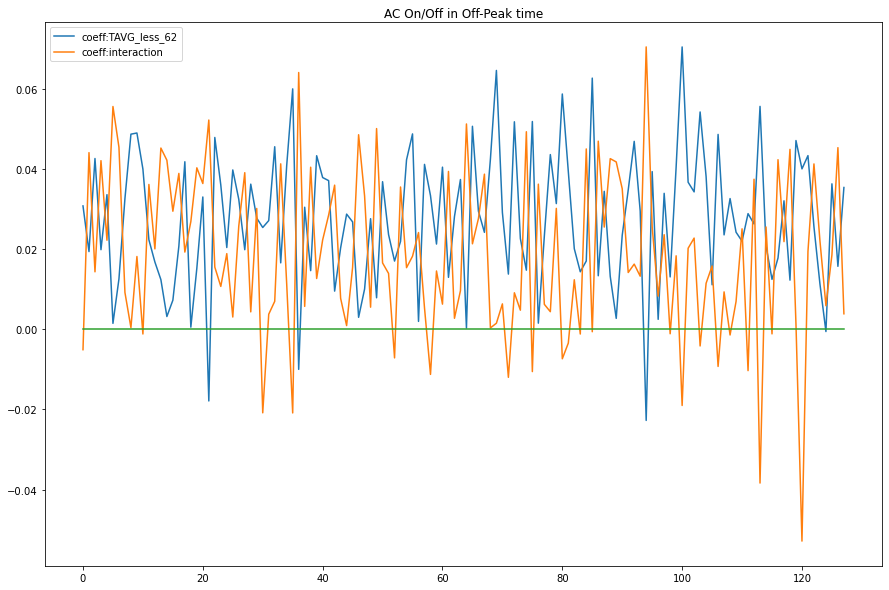

In [25]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")
plt.title('AC On/Off in Off-Peak time')
plt.show()

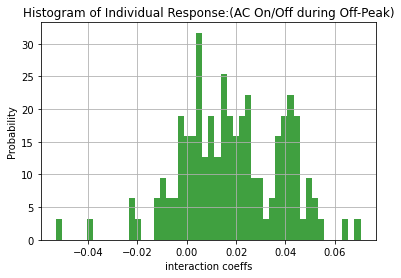

In [31]:
plt.hist(results['interaction'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('interaction coeffs')
plt.ylabel('Probability')
plt.title('Histogram of Individual Response:(AC On/Off during Off-Peak)')
plt.grid(True)
plt.show()

In [27]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         80
TAVG_less_62    80
interaction     80
intercept       80
dtype: int64
user_id         9
TAVG_less_62    9
interaction     9
intercept       9
dtype: int64


In [28]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

2.4457942266543578
-0.19630525697515044


In [29]:
df_sac_18n19_daily_offpeak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_offpeak_w_temperature['AC_cooling_on'], \
              exog=df_sac_18n19_daily_offpeak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print('*'*34+'On/Off: Peak'+'*'*34)
print(reg_result.summary())


**********************************On/Off: Peak**********************************
                            OLS Regression Results                            
Dep. Variable:          AC_cooling_on   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5367.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:36:07   Log-Likelihood:                -18591.
No. Observations:               31083   AIC:                         3.719e+04
Df Residuals:                   31080   BIC:                         3.721e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [30]:
df_sac_18n19_daily_offpeak.user_id.nunique()

128